# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="https://raw.githubusercontent.com/learn-co-curriculum/dsc-monty-hall-problem-lab/master/images/Image_58_MontyHall.png" alt="doors 1, 2, and 3 with two goats and a car">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [13]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

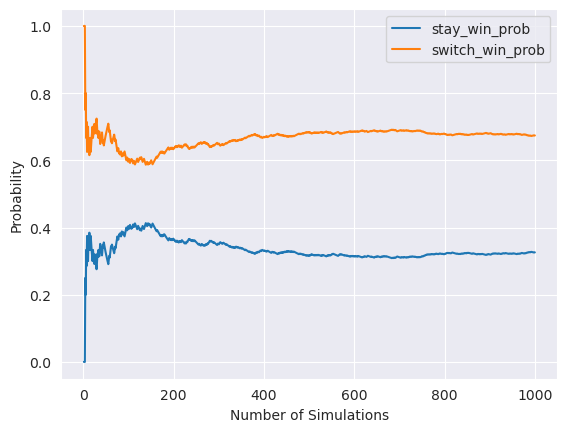

In [55]:
import random

def monty_hall_simulation(num_simulations):
    stay_win_prob = []
    switch_win_prob = []
    stay_win_count = 0
    switch_win_count = 0

    for _ in range(1, num_simulations+1):
        # Randomly place the car behind one of the doors
        car_behind_door = random.randint(1, 3)

        # Contestant's initial choice
        contestant_choice = random.randint(1, 3)

        # Find remaining door after Monty Hall reveals a door with a goat
        remaining_doors = [door for door in [1, 2, 3] if door != contestant_choice and door != car_behind_door]
        monty_reveal = random.choice(remaining_doors)

        # Simulate staying with initial choice
        if contestant_choice == car_behind_door:
            stay_win_count += 1

        # Simulate switching choice
        new_choice = [door for door in [1, 2, 3] if door != contestant_choice and door != monty_reveal][0]
        if new_choice == car_behind_door:
            switch_win_count += 1
            
        # Append the empty lists with respective probabilities
        stay_win_prob.append(stay_win_count / _)
        switch_win_prob.append(switch_win_count / _)
        
    # Plot line graphs of the probabilities
    plt.plot(range(1, num_simulations+1), stay_win_prob)
    plt.plot(range(1, num_simulations+1), switch_win_prob)
    plt.ylabel('Probability')
    plt.xlabel('Number of Simulations')
    plt.legend(['stay_win_prob', 'switch_win_prob']);
        
    return None
    
monty_hall_simulation(1000)

## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 